1

In [0]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 109.2MB 85kB/s 
     |████████████████████████████████| 491kB 41.3MB/s 
     |████████████████████████████████| 3.2MB 45.5MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
import numpy as np

train_data = [[1,0,0,0,1,
               0,1,0,1,0,
               0,0,1,0,0,
               0,1,0,1,0,
               1,0,0,0,1],
              [0,1,1,1,0,
               1,0,0,0,1,
               1,0,0,0,1,
               1,0,0,0,1,
               0,1,1,1,0
              ]]
            #1 x 2 o
train_label = [1, 0]

weights = np.zeros((25))
bias = 0
epoch = 7000
learning_rate = 1


def predict(inputs):
    summation = np.dot(inputs, weights) + bias
    if summation > 0:
        activation = 1
    else:
        activation = 0
    return activation


def train(training_inputs, labels):
    global bias
    for inputs, label in zip(training_inputs, labels):
        prediction = predict(inputs)
        weights[0:] += learning_rate * np.dot((label - prediction), inputs)
        bias += learning_rate * (label - prediction)


for _ in range(epoch):
    train(train_data, train_label)

test_data = [[
            1,0,1,0,1,
            0,1,0,1,0,
            0,0,1,0,1,
            0,1,0,1,0,
            1,0,1,0,1,  
            ],[
            0,1,1,1,0,
            1,0,1,0,1,
            1,0,0,1,1,
            1,0,0,0,1,
            0,1,0,1,0   
            ]]


hasil1=predict(test_data[0])
print("test data 1 :")
if(hasil1==0):
    print("O")

elif(hasil1==1):
    print("X")


hasil2=predict(test_data[1])
print("test data 2 :")
if(hasil2==0):
    print("O")

elif(hasil2==1):
    print("X")


test data 1 :
X
test data 2 :
O


2

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

x_data=[[0.08, 0.72],
        [0.2, 0.5],
        [0.24, 0.30],
        [0.35, 0.35],
        [0.45, 0.50],
        [0.02, 0.48],
        [0.1, 1.0],
        [0.36, 0.75],
        [0.52, 0.24],
        [0.70, 0.65],
        [0.8, 0.26],
        [0.92, 0.45]]
        
y_data=[[1],[1],[1],[1],[1],[-1],[-1],[-1],[-1],[-1],[-1],[-1]]


scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)

encoder = OneHotEncoder(sparse=False)
y_data = encoder.fit_transform(y_data)

layer = {
    'input' : 2,
    'hidden' : 4,
    'output' : 2
}

weight = {
    'to_hidden' : tf.Variable(tf.random_normal([layer['input'],layer['hidden']])),
    'to_output' : tf.Variable(tf.random_normal([layer['hidden'],layer['output']]))
}

bias = {
    'to_hidden' : tf.Variable(tf.random_normal([layer['hidden']])),
    'to_output' : tf.Variable(tf.random_normal([layer['output']]))
}

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= .2)
#dia random terus ambil 20% di test 80% di train

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x = tf.placeholder(tf.float32, [None, layer['input']])
target = tf.placeholder(tf.float32, [None,layer['output']])

def predict():
    wx_b1= tf.matmul(x, weight['to_hidden']) + bias['to_hidden']
    y1= tf.nn.sigmoid(wx_b1)

    wx_b2= tf.matmul(y1, weight['to_output']) + bias['to_output']
    y2= tf.nn.sigmoid(wx_b2)
    return y2

y= predict()
epoch = 7000
alpha = 0.5
error = tf.reduce_mean(0.5 * (target - y) **2)
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(error)



print(x.shape)
print(target.shape)

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for i in range (epoch) :
        sess.run(train, feed_dict={x:x_train, target:y_train})
        
        if i % 500 == 0 :
            true_prediction = tf.equal(tf.argmax(y, axis=1),tf.argmax(target, axis=1))
            accuracy = tf.reduce_mean(tf.cast(true_prediction,tf.float32))
            accuracy = sess.run (accuracy, feed_dict= {
                x:x_test,
                target: y_test
            })
            print('Epoch-{} Accuracy: {}'.format(i,accuracy))

(9, 2)
(9, 2)
(3, 2)
(3, 2)
(?, 2)
(?, 2)
Epoch-0 Accuracy: 0.3333333432674408
Epoch-500 Accuracy: 0.3333333432674408
Epoch-1000 Accuracy: 0.0
Epoch-1500 Accuracy: 0.6666666865348816
Epoch-2000 Accuracy: 0.6666666865348816
Epoch-2500 Accuracy: 0.6666666865348816
Epoch-3000 Accuracy: 0.6666666865348816
Epoch-3500 Accuracy: 0.6666666865348816
Epoch-4000 Accuracy: 0.6666666865348816
Epoch-4500 Accuracy: 0.6666666865348816
Epoch-5000 Accuracy: 0.6666666865348816
Epoch-5500 Accuracy: 0.6666666865348816
Epoch-6000 Accuracy: 0.6666666865348816
Epoch-6500 Accuracy: 0.6666666865348816


 3

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [62]:
df = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


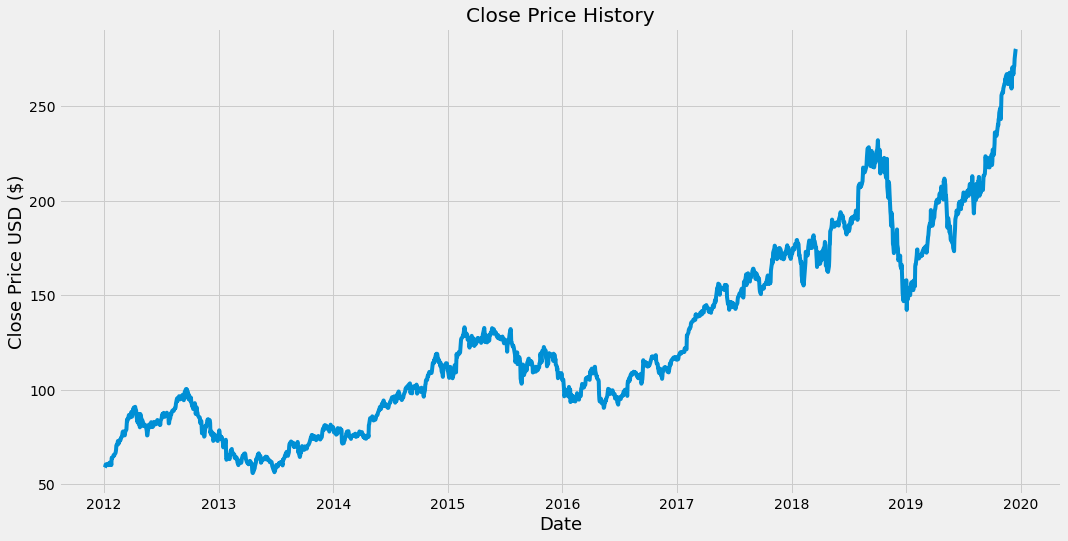

In [63]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [0]:
data = df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1)
data = data.values

In [0]:
sc = MinMaxScaler(feature_range=(0,1))
data_scaled = sc.fit_transform(data)

In [70]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(data_scaled,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1596
399
1596
399


In [67]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [71]:
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)




Train on 1596 samples, validate on 399 samples
Epoch 1/300
1596/1596 [==============================] - 2s 1ms/step - loss: 0.0042 - val_loss: 0.0075
Epoch 2/300
1596/1596 [==============================] - 2s 957us/step - loss: 0.0045 - val_loss: 0.0025
Epoch 3/300
1596/1596 [==============================] - 2s 940us/step - loss: 0.0051 - val_loss: 0.0031
Epoch 4/300
1596/1596 [==============================] - 1s 903us/step - loss: 0.0041 - val_loss: 0.0024
Epoch 5/300
1596/1596 [==============================] - 1s 931us/step - loss: 0.0039 - val_loss: 0.0013
Epoch 6/300
1596/1596 [==============================] - 2s 975us/step - loss: 0.0018 - val_loss: 8.1616e-04
Epoch 7/300
1596/1596 [==============================] - 2s 941us/step - loss: 4.0616e-04 - val_loss: 5.4282e-04
Epoch 8/300
1596/1596 [==============================] - 2s 959us/step - loss: 1.5226e-04 - val_loss: 6.3857e-04
Epoch 9/300
1596/1596 [==============================] - 1s 928us/step - loss: 1.7419e-04 - 

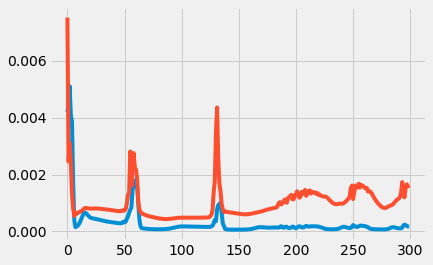

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [73]:
X_test[0]

array([[0.57991274],
       [0.5857448 ],
       [0.59767603],
       [0.5912207 ],
       [0.58926183],
       [0.58164901],
       [0.58939538]])

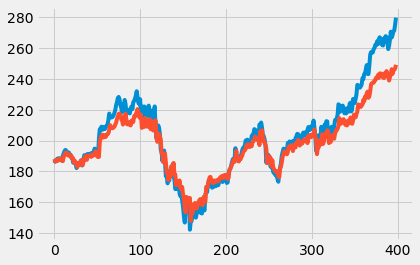

In [75]:
Xt = model.predict(X_test)
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(Xt))

In [79]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(sc.inverse_transform(Xt),sc.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(sc.inverse_transform(Xt))
act.append(sc.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[189.373]], actual:[[190.91999817]]


In [0]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

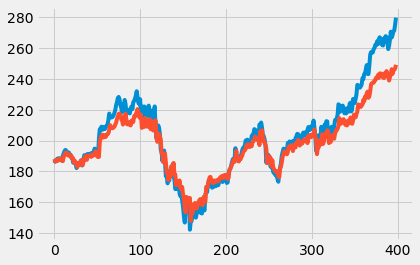

In [83]:
Xt = model.predict(X_test)
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(Xt))